In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.misc import electrocardiogram

In [51]:
x = electrocardiogram()[2000:4000]

In [52]:
peaks, _ = find_peaks(x, height=0)

## 기본 예제

### Value가 0 이상인 peak 검출

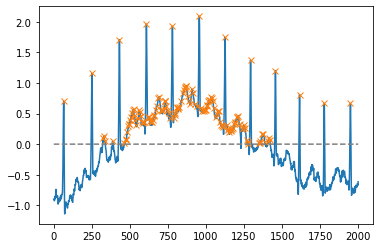

In [53]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")

### Sin(x) < f(x) < Cos(x) 에서 peak 검출

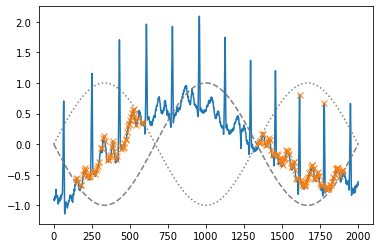

In [54]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

###  Peak간 Distance를 이용한 Peak 검출

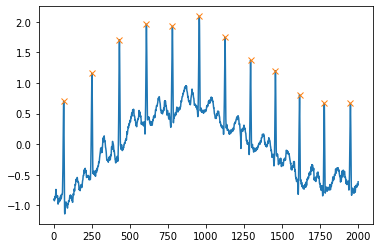

In [55]:
peaks, _ = find_peaks(x, distance=100)
np.diff(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

###  Peak간 Prominence를 이용한 Peak 검출


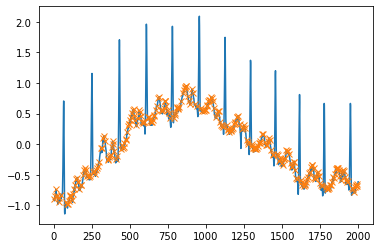

In [65]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
properties["prominences"].max()
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [74]:
from scipy.signal import find_peaks, peak_prominences

In [75]:
x = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(x) + 0.6 * np.sin(2.6 * x)

In [76]:
peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)[0]
prominences

array([1.24159486, 0.47840168, 0.28470524, 3.10716793, 0.284603  ,
       0.47822491, 2.48340261, 0.47822491])

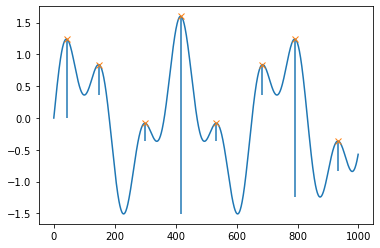

In [81]:
contour_heights = x[peaks] - prominences
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
plt.show()

### QRS가 넓은 파형 검출 (넓이)

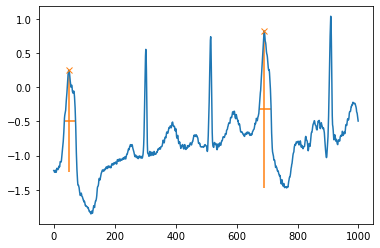

In [72]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=10)
properties["prominences"], properties["widths"]
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()